# Лабораторная работа по заданию №  8. Практический анализ современных алгоритмов

## Раздел 4 - Разделяй и властвуй. 4.1. Задача поиска максимального подмассива

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import time

### Реализация функции

In [2]:
def find_max_crossing_subarray(A, low, mid, high):
    left_sum = float("-inf")
    summ = 0
    for i in reversed(range(low, mid+1)):
        summ = summ+A[i-1]
        if summ > left_sum:
            left_sum = summ
            max_left = i
    right_sum = float("-inf")
    summ=0
    for j in range(mid+1, high+1):
        summ=summ+A[j-1]
        if summ>right_sum:
            right_sum=summ
            max_right=j
    return (max_left, max_right, left_sum+right_sum)

def find_maximum_subarray(A, low, high):
    if high==low:
        return (low, high, A[int(low)-1])
    else:  
        mid=(low+high)//2
        left_low, left_high, left_sum = find_maximum_subarray(A, low, mid)
        right_low, right_high, right_sum = find_maximum_subarray(A, mid+1, high)
        cross_low, cross_high, cross_sum = find_max_crossing_subarray(A, low, mid, high)
        if (left_sum>=right_sum) and (left_sum>=cross_sum):
            return (left_low, left_high, left_sum)
        elif (right_sum>=left_sum) and (right_sum>=cross_sum):
            return right_low, right_high, right_sum
        else:
            return cross_low, cross_high, cross_sum

### Объявление функции для визуализации

In [3]:
def visualize_result(A, left, right):
    plt.rcParams['figure.figsize'] = [14, 6]
    fig, ax = plt.subplots()
    ax.plot([i for i in range(len(A))], A, color='#FFB6C1', label='Исходные данные')
    ax.plot([i for i in range(len(A))], [0 for i in range(len(A))], color='blue', linewidth=1, label='Нулевая линия')
    ax.set(xlabel='Дни', ylabel='Изменение в цене',title='Визуализация изменений в цене')
    ax.axvline(x=left, linewidth=2, color='purple', linestyle='dashed', label='Максимальный подмассив')
    ax.axvline(x=right, linewidth=2, color='purple', linestyle='dashed')
    leg = plt.legend()
    ax.grid()
    plt.show()

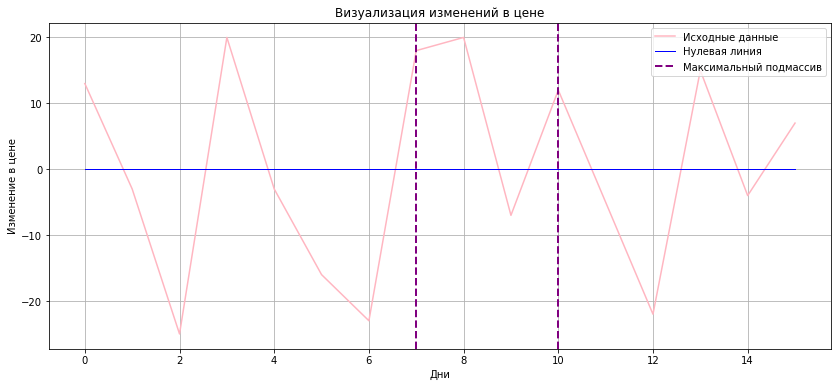

In [34]:
#пример из книги
A=[13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
resut=find_maximum_subarray(A, 1, len(A))
left=resut[0]-1
right=resut[1]-1
summ=resut[2]
visualize_result(A, left, right)

Массив значений:
[  5.23270841 -17.5294944  -17.14540262   5.59822883  -4.33924255
  11.89861001  -2.34088434 -13.98955583  -2.11542089  14.23721676
  -5.54667627  15.70913775   5.88970773   5.06880732  12.72526129
 -17.81131725   2.44352566 -13.30784842  10.32086858  10.6668162 ]


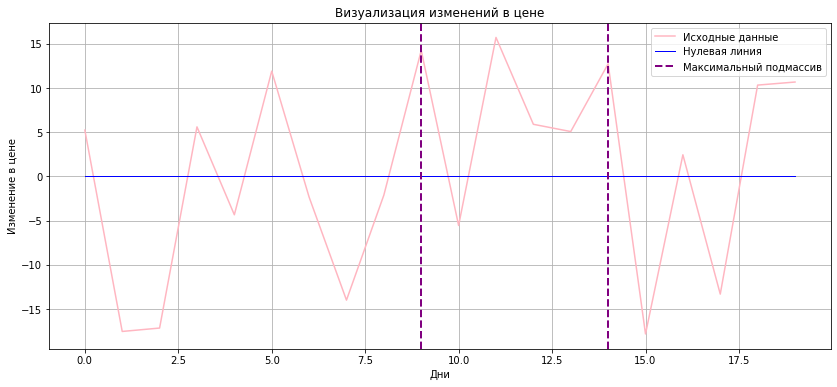

In [35]:
#проверка на случайном массиве
A=np.random.uniform(-20, 20, 20)
print('Массив значений:')
print(A)
resut=find_maximum_subarray(A, 1, len(A))
left=resut[0]-1
right=resut[1]-1
summ=resut[2]
visualize_result(A, left, right)

## Алгоритм работает корректно, можно приступать к замерам временной сложности 

In [63]:
time_array=[]
number_array=np.arange(10,5000,10)
for i in number_array:
    A=np.random.uniform(-20, 20, i)
    res_time=0
    for t in range(5):
        start_time = time.time()
        resut=find_maximum_subarray(A, 1, len(A))
        current_time=time.time() - start_time
        print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    mean_time=res_time/5
    time_array.append(mean_time)
    print("Mean time: "+'{:0.9f}'.format(mean_time/5))
    #mem = max(memory_usage((find_maximum_subarray, (A, 1, len(A)))))
    #print("Maximum memory used: {} MiB".format(mem))

Current time: 0.000069380
Current time: 0.000062227
Current time: 0.000057220
Current time: 0.000054121
Current time: 0.000056267
Mean time: 0.000011969
Current time: 0.000151157
Current time: 0.000146627
Current time: 0.000124931
Current time: 0.000113726
Current time: 0.000123978
Mean time: 0.000026417
Current time: 0.000208616
Current time: 0.000195503
Current time: 0.000207186
Current time: 0.000181913
Current time: 0.000215292
Mean time: 0.000040340
Current time: 0.000263453
Current time: 0.000264645
Current time: 0.000254393
Current time: 0.000284195
Current time: 0.000199080
Mean time: 0.000050631
Current time: 0.000228882
Current time: 0.000219345
Current time: 0.000211954
Current time: 0.000219584
Current time: 0.000213146
Mean time: 0.000043716
Current time: 0.000366449
Current time: 0.000393629
Current time: 0.000378847
Current time: 0.000382423
Current time: 0.000399590
Mean time: 0.000076838
Current time: 0.000598669
Current time: 0.000551939
Current time: 0.000357628
Curr

Current time: 0.003863096
Current time: 0.003865957
Current time: 0.003867388
Current time: 0.003908634
Current time: 0.003912449
Mean time: 0.000776701
Current time: 0.003883362
Current time: 0.003937006
Current time: 0.003913403
Current time: 0.003985643
Current time: 0.004017353
Mean time: 0.000789471
Current time: 0.004007578
Current time: 0.004007339
Current time: 0.004028559
Current time: 0.003994942
Current time: 0.003997087
Mean time: 0.000801420
Current time: 0.004019022
Current time: 0.004222393
Current time: 0.003982306
Current time: 0.003972292
Current time: 0.003986597
Mean time: 0.000807304
Current time: 0.004147291
Current time: 0.004230261
Current time: 0.004110575
Current time: 0.004062414
Current time: 0.004073381
Mean time: 0.000824957
Current time: 0.004429102
Current time: 0.004225016
Current time: 0.004142284
Current time: 0.004504204
Current time: 0.004165173
Mean time: 0.000858631
Current time: 0.004387379
Current time: 0.004406929
Current time: 0.004256010
Curr

Current time: 0.007636070
Current time: 0.007503510
Current time: 0.007564068
Mean time: 0.001516886
Current time: 0.007312059
Current time: 0.007536173
Current time: 0.007459164
Current time: 0.007382631
Current time: 0.007780313
Mean time: 0.001498814
Current time: 0.007245779
Current time: 0.007548094
Current time: 0.007447243
Current time: 0.007486105
Current time: 0.007539034
Mean time: 0.001490650
Current time: 0.007466316
Current time: 0.007736921
Current time: 0.009000778
Current time: 0.011031389
Current time: 0.009393930
Mean time: 0.001785173
Current time: 0.008958101
Current time: 0.009001017
Current time: 0.008915663
Current time: 0.008362770
Current time: 0.007963181
Mean time: 0.001728029
Current time: 0.007669687
Current time: 0.007768154
Current time: 0.007967234
Current time: 0.008212566
Current time: 0.008063316
Mean time: 0.001587238
Current time: 0.008407354
Current time: 0.008001089
Current time: 0.007916927
Current time: 0.007892847
Current time: 0.007776499
Mean

Current time: 0.010444880
Current time: 0.010807753
Mean time: 0.002116470
Current time: 0.010843754
Current time: 0.010593653
Current time: 0.010555506
Current time: 0.010640383
Current time: 0.010579348
Mean time: 0.002128506
Current time: 0.010694742
Current time: 0.010908842
Current time: 0.010835886
Current time: 0.010563612
Current time: 0.010493755
Mean time: 0.002139874
Current time: 0.010492563
Current time: 0.010661602
Current time: 0.010577440
Current time: 0.010815859
Current time: 0.010710001
Mean time: 0.002130299
Current time: 0.010694504
Current time: 0.010823488
Current time: 0.010846615
Current time: 0.010900974
Current time: 0.010771990
Mean time: 0.002161503
Current time: 0.010740519
Current time: 0.011141300
Current time: 0.011085510
Current time: 0.011284590
Current time: 0.010637522
Mean time: 0.002195578
Current time: 0.010658979
Current time: 0.010875463
Current time: 0.010920525
Current time: 0.010916948
Current time: 0.010901928
Mean time: 0.002170954
Current

Current time: 0.014232159
Current time: 0.014247894
Current time: 0.013988018
Mean time: 0.002814798
Current time: 0.013901234
Current time: 0.014557362
Current time: 0.014261246
Current time: 0.017248392
Current time: 0.014088392
Mean time: 0.002962265
Current time: 0.014075518
Current time: 0.014204979
Current time: 0.014223337
Current time: 0.014379978
Current time: 0.014464855
Mean time: 0.002853947
Current time: 0.014401197
Current time: 0.014612675
Current time: 0.014801741
Current time: 0.014506340
Current time: 0.014512062
Mean time: 0.002913361
Current time: 0.014082432
Current time: 0.014542103
Current time: 0.014532089
Current time: 0.014421940
Current time: 0.014570713
Mean time: 0.002885971
Current time: 0.014580965
Current time: 0.014855385
Current time: 0.014594316
Current time: 0.015278339
Current time: 0.015365124
Mean time: 0.002986965
Current time: 0.014505863
Current time: 0.014704704
Current time: 0.014920712
Current time: 0.015069008
Current time: 0.014641762
Mean

Current time: 0.017708302
Current time: 0.017736197
Current time: 0.018429995
Current time: 0.017939329
Mean time: 0.003610086
Current time: 0.017444849
Current time: 0.017692566
Current time: 0.017759562
Current time: 0.017730236
Current time: 0.018267393
Mean time: 0.003555784
Current time: 0.017978668
Current time: 0.017898321
Current time: 0.017919302
Current time: 0.017960787
Current time: 0.017941475
Mean time: 0.003587942
Current time: 0.018463612
Current time: 0.018231153
Current time: 0.017900467
Current time: 0.017967463
Current time: 0.018082142
Mean time: 0.003625793
Current time: 0.018111944
Current time: 0.018012524
Current time: 0.018123388
Current time: 0.018125057
Current time: 0.018048286
Mean time: 0.003616848
Current time: 0.018017292
Current time: 0.018519640
Current time: 0.018176079
Current time: 0.024847269
Current time: 0.023361206
Mean time: 0.004116859
Current time: 0.021328449
Current time: 0.019220829
Current time: 0.017768621
Current time: 0.017860174
Curr

Current time: 0.023371935
Current time: 0.022027731
Current time: 0.021425724
Current time: 0.021405458
Mean time: 0.004534035
Current time: 0.021436453
Current time: 0.021326542
Current time: 0.021614790
Current time: 0.021555424
Current time: 0.021520615
Mean time: 0.004298153
Current time: 0.021529436
Current time: 0.021638393
Current time: 0.021882772
Current time: 0.022094011
Current time: 0.021595478
Mean time: 0.004349604
Current time: 0.021791458
Current time: 0.021783352
Current time: 0.021368980
Current time: 0.021524906
Current time: 0.021782160
Mean time: 0.004330034
Current time: 0.021880150
Current time: 0.022069693
Current time: 0.022292376
Current time: 0.025892496
Current time: 0.025664806
Mean time: 0.004711981
Current time: 0.023399115
Current time: 0.021719933
Current time: 0.022048950
Current time: 0.022232771
Current time: 0.021650076
Mean time: 0.004442034
Current time: 0.021786213
Current time: 0.021893263
Current time: 0.022514105
Current time: 0.021918058
Curr

Current time: 0.025185823
Current time: 0.025552750
Mean time: 0.005009527
Current time: 0.024863482
Current time: 0.025180578
Current time: 0.024778605
Current time: 0.024897575
Current time: 0.025023460
Mean time: 0.004989748
Current time: 0.024802446
Current time: 0.025067091
Current time: 0.025161028
Current time: 0.024377823
Current time: 0.026839972
Mean time: 0.005049934
Current time: 0.024679899
Current time: 0.025121450
Current time: 0.024664164
Current time: 0.025012493
Current time: 0.025117159
Mean time: 0.004983807
Current time: 0.024614096
Current time: 0.024680853
Current time: 0.024913788
Current time: 0.025212526
Current time: 0.024813414
Mean time: 0.004969387
Current time: 0.024893761
Current time: 0.025286436
Current time: 0.024869442
Current time: 0.024996519
Current time: 0.025365591
Mean time: 0.005016470
Current time: 0.025250196
Current time: 0.025350809
Current time: 0.025574207
Current time: 0.025218964
Current time: 0.025434494
Mean time: 0.005073147
Current

Current time: 0.028807163
Current time: 0.028725863
Current time: 0.028601170
Mean time: 0.005764351
Current time: 0.029006481
Current time: 0.029288292
Current time: 0.029330015
Current time: 0.029400110
Current time: 0.029534101
Mean time: 0.005862360
Current time: 0.029284477
Current time: 0.029495955
Current time: 0.028256178
Current time: 0.028874397
Current time: 0.034862995
Mean time: 0.006030960
Current time: 0.032266378
Current time: 0.028531551
Current time: 0.028787374
Current time: 0.029343367
Current time: 0.029313326
Mean time: 0.005929680
Current time: 0.028416157
Current time: 0.029073954
Current time: 0.028890133
Current time: 0.029026747
Current time: 0.029102564
Mean time: 0.005780382
Current time: 0.032097340
Current time: 0.028909445
Current time: 0.028790236
Current time: 0.028713703
Current time: 0.028854609
Mean time: 0.005894613
Current time: 0.029502392
Current time: 0.029746771
Current time: 0.029824734
Current time: 0.029381514
Current time: 0.030086279
Mean

## Визуализация временной сложности алгоритма

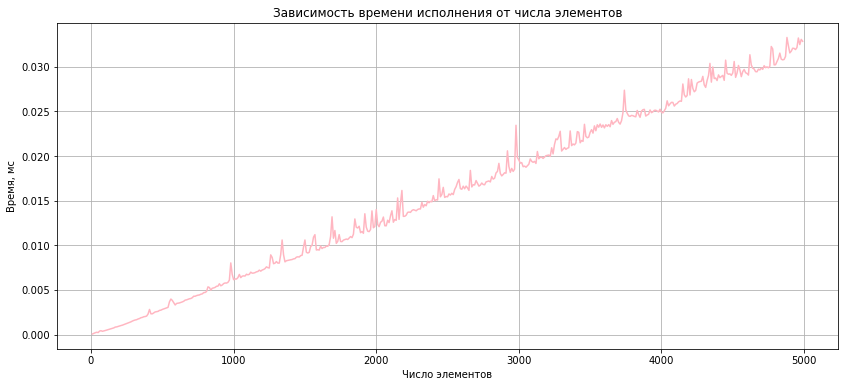

In [64]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(number_array, time_array, color='#FFB6C1')
ax.set(xlabel='Число элементов', ylabel='Время, мс',title='Зависимость времени исполнения от числа элементов')
ax.grid()
plt.show()

## Глава 15 - Динамическое программирование. 15.1. Разрезание стержня

### Реализация функции

In [26]:
def p(i):
    length=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    prices=[2, 5, 8, 9, 10, 17, 17, 20, 24, 30]
    return prices[i]

### Рекурсивная нисходящая реализация

In [24]:
p=[1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
def cut_rod(p, n):
    if n==0:
        return 0        
    q=float("-inf")
    for i in range(1, n+1):
        q=max(q, p[i-1]+cut_rod(p, n-i))
    return q
print(cut_rod(p, 2))

5


## Применение динамического программирования для оптимального разрезания стержня

In [53]:
def memorized_cut_rod_aux(p, n, r):
    if r[n-1]>=0:
        return r[n-1]
    if n==0:
        q=0
    else:
        q=float("-inf")
        for i in range (1, n+1):
            q=max(q, p[i-1]+memorized_cut_rod_aux(p, n-i, r))
    r[n-1] = q
    return q

def memoized_cut_rod(p, n):
    r=np.arange(0, n).astype('float')
    for i in range (n):
        r[i]=float("-inf")
    return memorized_cut_rod_aux(p, n, r)

print(memoized_cut_rod(p, 3))        

8.0


## Восходящая версия

In [83]:
def bottom_up_cut_rod(p, n):
    r = [0 for _ in range(n)]
    for i in range(n):
        best_p = -1
        for j in range(i):
            best_p = max(best_p, p[j + 1] + r[i - (j + 1) - 1])
        r[i] = best_p
    return r[n - 1]
print(bottom_up_cut_rod(p, 3))   

8


In [92]:
def extended_bottom_up_cut_rod(p, n):
    # init array s to save the best cut selected
    r, s = [0 for _ in range(n)], [0 for _ in range(n)]
    for i in range(n):
        best_p = 1
        for j in range(i):
            if p[j + 1] + r[i - (j + 1) - 1] > best_p:
                best_p = p[j + 1] + r[i - (j + 1) - 1]
                s[i] = j+ 2  # save the best cut here
        r[i] = best_p
    return r, s
print(extended_bottom_up_cut_rod(p, 10))                

([1, 5, 8, 10, 13, 17, 18, 22, 25, 30], [0, 2, 3, 2, 2, 6, 2, 2, 3, 10])
